# Table of Contents:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,f1_score
from sklearn.metrics import roc_auc_score,recall_score,precision_score
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
import statistics as stats

# Importing Dataset

In [3]:
d1=pd.read_csv(r"C:\Users\ADMIN\Desktop\Great Learning\Amazon Sale Report.csv")
d1.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


# Basic Five Point Summary

In [4]:
d1.shape

(128975, 24)

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
d1.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# Converting data time to correct datatype

In [7]:
d1['Date']=pd.to_datetime(d1['Date'])

# Drop unwanted columns:

In [8]:
d1 = d1.drop(['Date','index','Order ID','Style','SKU','ASIN','Unnamed: 22','fulfilled-by','currency','ship-country','promotion-ids','ship-city','ship-postal-code'], axis=1)


In [9]:
d1.head()


,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-state,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,NaN,0,647.62,MAHARASHTRA,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,406.00,KARNATAKA,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,329.00,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,NaN,0,753.33,PUDUCHERRY,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,Shipped,1,574.00,TAMIL NADU,False


# Finding Null Values:

In [10]:
d1.isnull().sum()

Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status        6872
Qty                      0
Amount                7795
ship-state              33
B2B                      0
dtype: int64

# Fill Null Values :

In [11]:
d1['Courier Status'].fillna(d1['Courier Status'].mode()[0],inplace=True)

In [12]:
d1['ship-state'].fillna(d1['ship-state'].mode()[0],inplace=True)

In [13]:
d1.isnull().sum()

Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
Amount                7795
ship-state               0
B2B                      0
dtype: int64

# Filling missing values of amount according to category

In [14]:
# Define a function to fill missing values with the median
def fill_missing_with_median(series):
    return series.fillna(series.median())

# Group by 'Category', apply the function to 'Amount', and assign it back
d1['Amount'] = d1.groupby('Category')['Amount'].transform(fill_missing_with_median)


In [15]:
d1.isnull().sum()

Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-state            0
B2B                   0
dtype: int64

In [16]:
d1.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-state,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,Shipped,0,647.62,MAHARASHTRA,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,406.00,KARNATAKA,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,329.00,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,Shipped,0,753.33,PUDUCHERRY,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,Shipped,1,574.00,TAMIL NADU,False


# Ship-State having duplicated or same spelling with different cases

In [17]:
d1['ship-state'].replace('APO','ANDHRA PRADESH',inplace=True)

In [18]:
d1['ship-state'].replace('Arunachal Pradesh','ARUNACHAL PRADESH',inplace=True)

In [19]:
d1['ship-state'].replace('Arunachal pradesh','ARUNACHAL PRADESH',inplace=True)

In [20]:
d1['ship-state'].replace('AR','ARUNACHAL PRADESH',inplace=True)

In [21]:
d1['ship-state'].replace('Bihar','BIHAR',inplace=True)

In [22]:
d1['ship-state'].replace('bihar','BIHAR',inplace=True)

In [23]:
d1['ship-state'].replace('Chandigarh','CHANDIGARH',inplace=True)

In [24]:
d1['ship-state'].replace('Delhi','DELHI',inplace=True)

In [25]:
d1['ship-state'].replace('delhi','DELHI',inplace=True)

In [26]:
d1['ship-state'].replace('Goa','GOA',inplace=True)

In [27]:
d1['ship-state'].replace('goa','GOA',inplace=True)

In [28]:
d1['ship-state'].replace('Manipur','MANIPUR',inplace=True)

In [29]:
d1['ship-state'].replace('Meghalaya','MEGHALAYA',inplace=True)

In [30]:
d1['ship-state'].replace('Mizoram','MIZORAM',inplace=True)

In [31]:
d1['ship-state'].replace('NL','NAGALAND',inplace=True)

In [32]:
d1['ship-state'].replace('Nagaland','NAGALAND',inplace=True)

In [33]:
d1['ship-state'].replace('Odisha','ODISHA',inplace=True)

In [34]:
d1['ship-state'].replace('Orissa','ODISHA',inplace=True)

In [35]:
d1['ship-state'].replace('orissa','ODISHA',inplace=True)

In [36]:
d1['ship-state'].replace('punjab','PUNJAB',inplace=True)

In [37]:
d1['ship-state'].replace('PB','PUNJAB',inplace=True)

In [38]:
d1['ship-state'].replace('Punjab','PUNJAB',inplace=True)

In [39]:
d1['ship-state'].replace('Punjab/Mohali/Zirakpur','PUNJAB',inplace=True)

In [40]:
d1['ship-state'].replace('Puducherry','PUDUCHERRY',inplace=True)

In [41]:
d1['ship-state'].replace('Pondicherry','PUDUCHERRY',inplace=True)

In [42]:
d1['ship-state'].replace('RJ','RAJASTHAN',inplace=True)

In [43]:
d1['ship-state'].replace('Rajasthan','RAJASTHAN',inplace=True)

In [44]:
d1['ship-state'].replace('Rajshthan','RAJASTHAN',inplace=True)

In [45]:
d1['ship-state'].replace('Rajsthan','RAJASTHAN',inplace=True)

In [46]:
d1['ship-state'].replace('rajasthan','RAJASTHAN',inplace=True)

In [47]:
d1['ship-state'].replace('rajsthan','RAJASTHAN',inplace=True)

In [48]:
d1['ship-state'].replace('Sikkim','SIKKIM',inplace=True)

In [49]:
d1['ship-state'].sort_values().unique()

array(['ANDAMAN & NICOBAR ', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
       'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DADRA AND NAGAR',
       'DELHI', 'GOA', 'Gujarat', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LADAKH',
       'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
       'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'New Delhi', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL'], dtype=object)

In [50]:
d1.Qty.unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4,  8], dtype=int64)

In [51]:
#Filling Quantity with 1 where it is mistakenly given as 0

In [52]:
d1.loc[d1['Qty'] == 0, 'Qty'] = 1

# Adding Influence Column

In [53]:
d1['Influence_Score'] = d1['Qty'] * d1['Amount']

In [54]:
d1.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-state,B2B,Influence_Score
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,Shipped,1,647.62,MAHARASHTRA,False,647.62
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,406.00,KARNATAKA,False,406.00
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,329.00,MAHARASHTRA,True,329.00
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,Shipped,1,753.33,PUDUCHERRY,False,753.33
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,Shipped,1,574.00,TAMIL NADU,False,574.00


In [55]:
# First, calculate quantiles for each category
quantiles = d1.groupby('Category')['Influence_Score'].quantile([0.33, 0.66])

# Function to categorize based on quantiles
def categorize_amount(row):
    category = row['Category']
    amount = row['Influence_Score']
    low = quantiles[category].loc[0.33]
    high = quantiles[category].loc[0.66]
    
    if pd.isnull(amount):
        return 'Missing'  # or handle missing values differently
    elif amount <= low:
        return 'Low'
    elif amount <= high:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to create a new column 'Amount_Category'
d1['Influence_Category'] = d1.apply(categorize_amount,axis=1)

In [56]:
d1['Influence_Category'].value_counts()

Low       47360
High      42044
Medium    39571
Name: Influence_Category, dtype: int64

In [57]:
medium=d1[d1['Influence_Category']=='Medium']

In [58]:
medium.shape

(39571, 13)

In [59]:
medium.groupby('Category')['Influence_Category'].size()

Category
Blouse             433
Bottom             173
Ethnic Dress       485
Saree               54
Set              16644
Top               4439
Western Dress     4189
kurta            13154
Name: Influence_Category, dtype: int64

In [60]:
# Calculate the median count among the categories
median_count = medium['Category'].value_counts().median()

# Group the data by 'Category'
grouped = medium.groupby('Category')

# Create an empty DataFrame to store the sampled data
balanced_data = pd.DataFrame()

# Sample from each category to match the median count
for category, group in grouped:
    if len(group) >= median_count:
        sampled = group.sample(n=int(median_count), random_state=42)  # Sample to match the median count
    else:
        sampled = group.sample(n=int(median_count), replace=True, random_state=42)  # Use replacement if the count is lower
    balanced_data = pd.concat([balanced_data, sampled])

# Now 'balanced_data' contains approximately an equal number of samples for each category as the median count
 

In [61]:
balanced_data

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-state,B2B,Influence_Score,Influence_Category
24933,Shipped,Amazon,Amazon.in,Expedited,Blouse,XXL,Shipped,1,625.00,Gujarat,False,625.00,Medium
89222,Shipped,Amazon,Amazon.in,Expedited,Blouse,XXL,Shipped,1,625.00,MADHYA PRADESH,False,625.00,Medium
71032,Shipped,Amazon,Amazon.in,Expedited,Blouse,M,Shipped,1,599.00,UTTAR PRADESH,False,599.00,Medium
26825,Shipped,Amazon,Amazon.in,Expedited,Blouse,XXL,Shipped,1,625.00,TAMIL NADU,False,625.00,Medium
18897,Cancelled,Merchant,Amazon.in,Standard,Blouse,XL,Shipped,1,595.24,KARNATAKA,False,595.24,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88272,Shipped,Amazon,Amazon.in,Expedited,kurta,3XL,Shipped,1,406.00,KARNATAKA,False,406.00,Medium
109659,Shipped,Amazon,Amazon.in,Expedited,kurta,S,Shipped,1,406.00,KARNATAKA,False,406.00,Medium
118786,Cancelled,Amazon,Amazon.in,Expedited,kurta,XXL,Unshipped,1,471.00,TAMIL NADU,False,471.00,Medium
103842,Cancelled,Amazon,Amazon.in,Expedited,kurta,XXL,Cancelled,1,435.00,WEST BENGAL,False,435.00,Medium


In [62]:
balanced_data.groupby('Category')['Influence_Category'].size()

Category
Blouse           2337
Bottom           2337
Ethnic Dress     2337
Saree            2337
Set              2337
Top              2337
Western Dress    2337
kurta            2337
Name: Influence_Category, dtype: int64

In [63]:
# Concatenate the original dataset with the balanced_data
d1 = pd.concat([d1, balanced_data])

# Reset the index of the concatenated DataFrame
d1.reset_index(drop=True, inplace=True)


In [64]:
d1

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-state,B2B,Influence_Score,Influence_Category
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,Shipped,1,647.62,MAHARASHTRA,False,647.62,Low
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,406.00,KARNATAKA,False,406.00,Medium
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,329.00,MAHARASHTRA,True,329.00,Low
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,Shipped,1,753.33,PUDUCHERRY,False,753.33,Medium
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,Shipped,1,574.00,TAMIL NADU,False,574.00,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147666,Shipped,Amazon,Amazon.in,Expedited,kurta,3XL,Shipped,1,406.00,KARNATAKA,False,406.00,Medium
147667,Shipped,Amazon,Amazon.in,Expedited,kurta,S,Shipped,1,406.00,KARNATAKA,False,406.00,Medium
147668,Cancelled,Amazon,Amazon.in,Expedited,kurta,XXL,Unshipped,1,471.00,TAMIL NADU,False,471.00,Medium
147669,Cancelled,Amazon,Amazon.in,Expedited,kurta,XXL,Cancelled,1,435.00,WEST BENGAL,False,435.00,Medium


In [65]:
d1.isnull().sum()

Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-state            0
B2B                   0
Influence_Score       0
Influence_Category    0
dtype: int64

# Univariate Analysis:

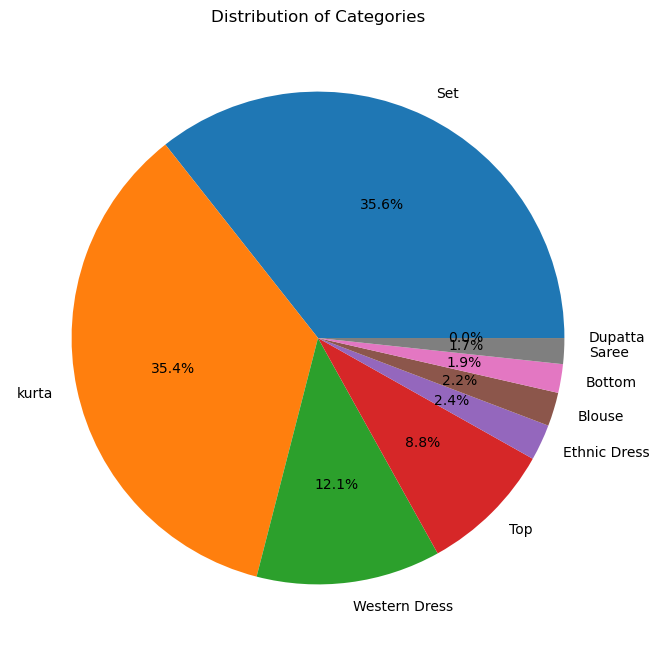

In [66]:
# Get unique categories and their counts
category_counts = d1['Category'].value_counts()

# Extract category names and counts
categories = category_counts.index.tolist()
counts = category_counts.tolist()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

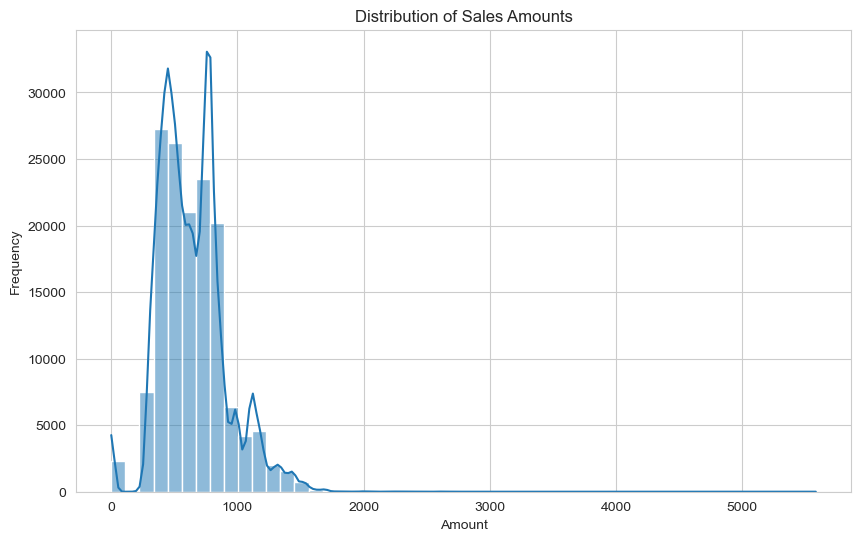

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot distribution of the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(d1['Amount'], bins=50, kde=True)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()



from the above plot we can infer that the products in the range of 500 to 1000 rupees sold more 

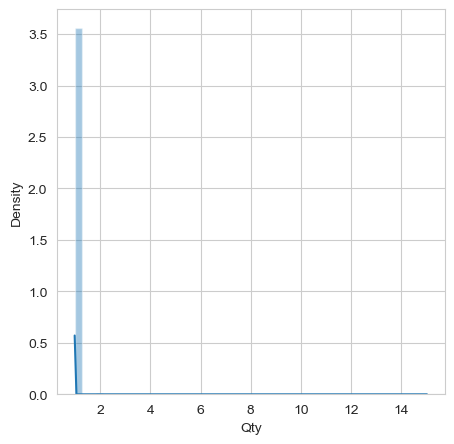

In [68]:
plt.figure(figsize=(5,5))
sns.distplot(d1['Qty'])
plt.show()

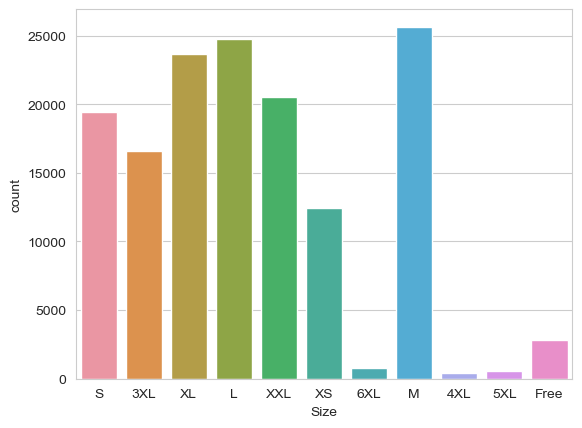

In [69]:
sns.countplot(d1,x='Size')
plt.show()

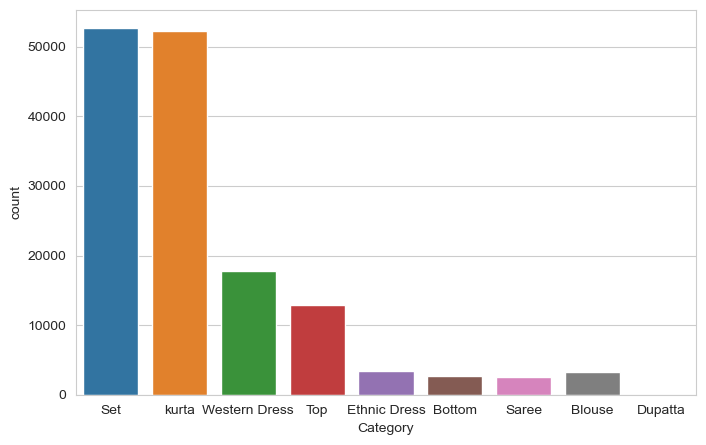

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(d1,x='Category')
plt.show()

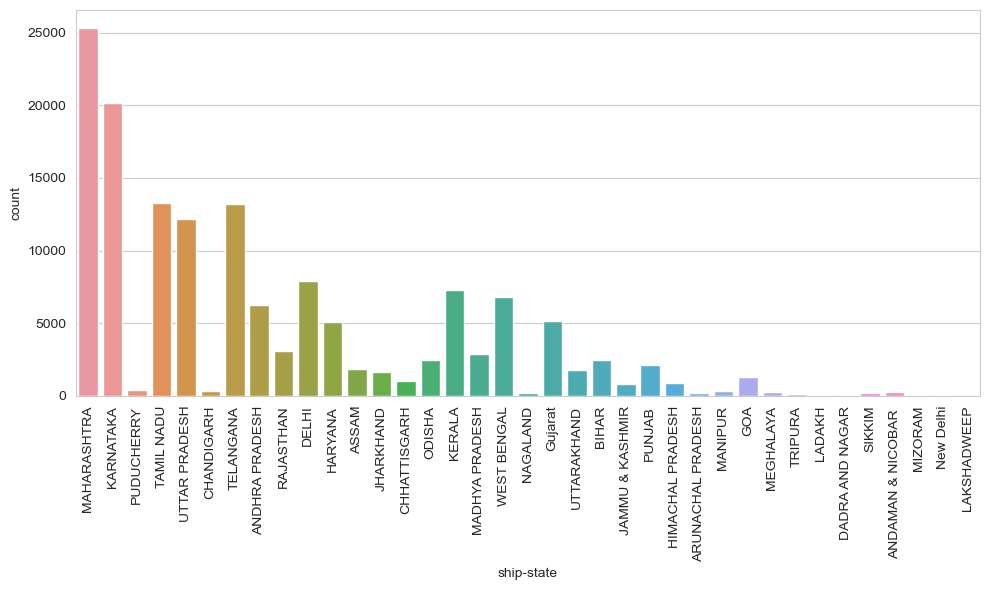

In [71]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=d1, x='ship-state')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


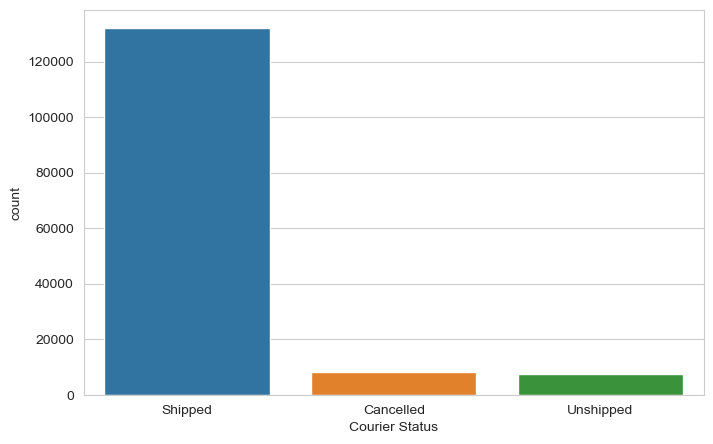

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(d1,x='Courier Status')
plt.show()

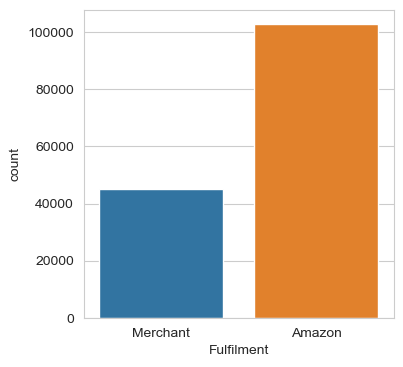

In [73]:
plt.figure(figsize=(4,4))
sns.countplot(d1,x='Fulfilment')
plt.show()

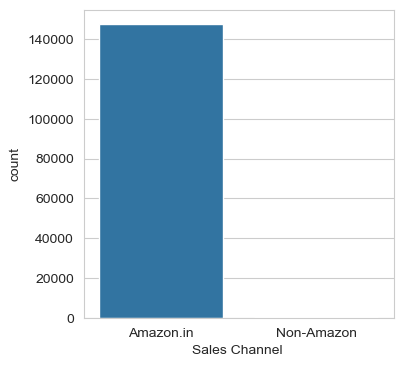

In [74]:
plt.figure(figsize=(4,4))
sns.countplot(d1,x='Sales Channel ')
plt.show()

from this plot we can infer that the consumers are preferring AMAZON more then opthen sales channels

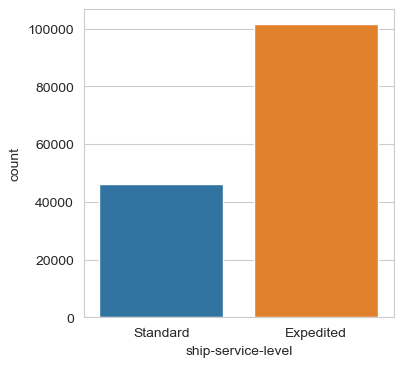

In [75]:
plt.figure(figsize=(4,4))
sns.countplot(d1,x='ship-service-level')
plt.show()

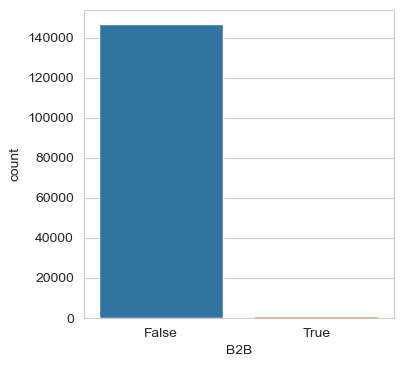

In [76]:
plt.figure(figsize=(4,4))
sns.countplot(d1,x='B2B')
plt.show()

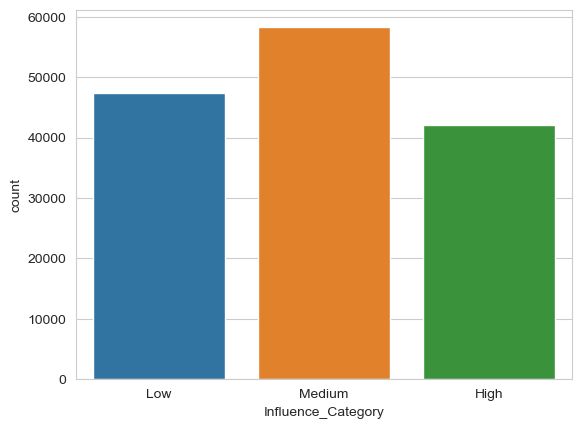

In [77]:
sns.countplot(d1,x='Influence_Category')
plt.show()

# BIVARIATE ANALYSIS

# Numerical vs Numerical

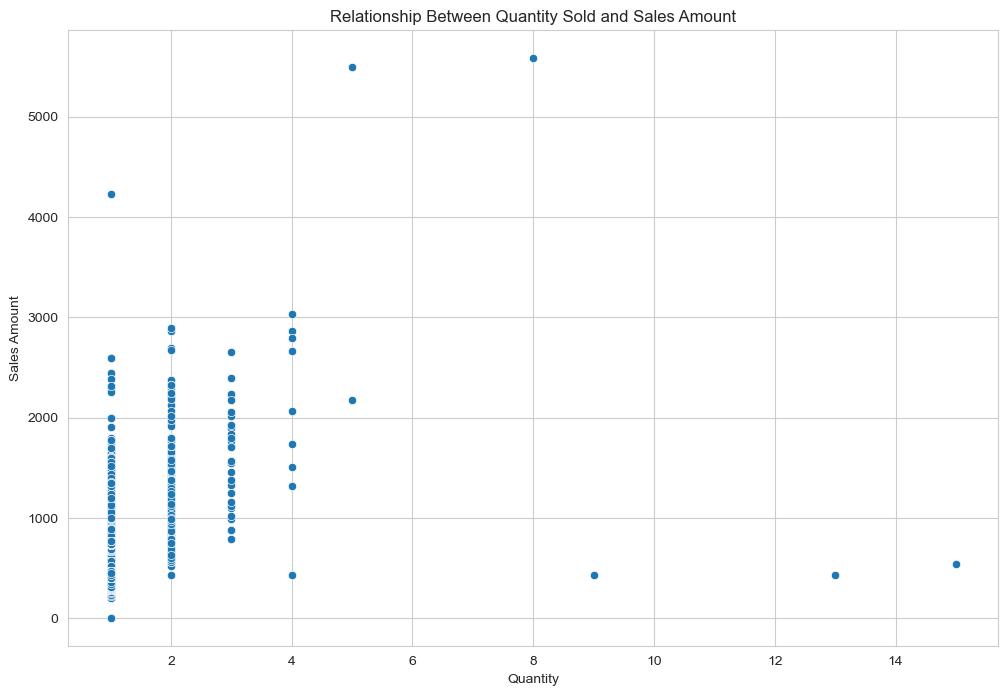

In [78]:

# Plot the relationship between 'Qty' and 'Amount'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Qty', y='Amount', data=d1)
plt.title('Relationship Between Quantity Sold and Sales Amount')
plt.xlabel('Quantity')
plt.ylabel('Sales Amount')
plt.show()

# Numerical vs Categorical

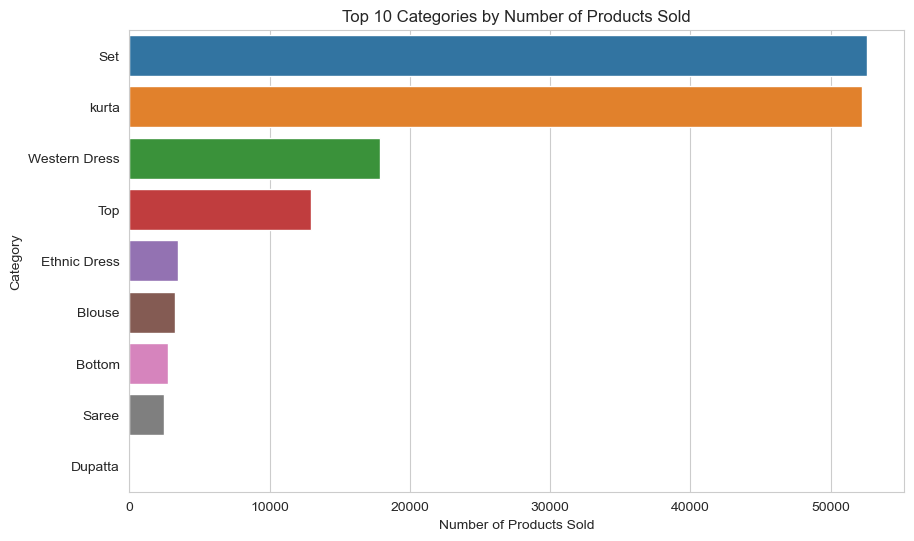

In [79]:
# Plot the top 10 categories by number of products sold
plt.figure(figsize=(10, 6))
top_categories = d1['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Categories by Number of Products Sold')
plt.xlabel('Number of Products Sold')
plt.ylabel('Category')
plt.show()

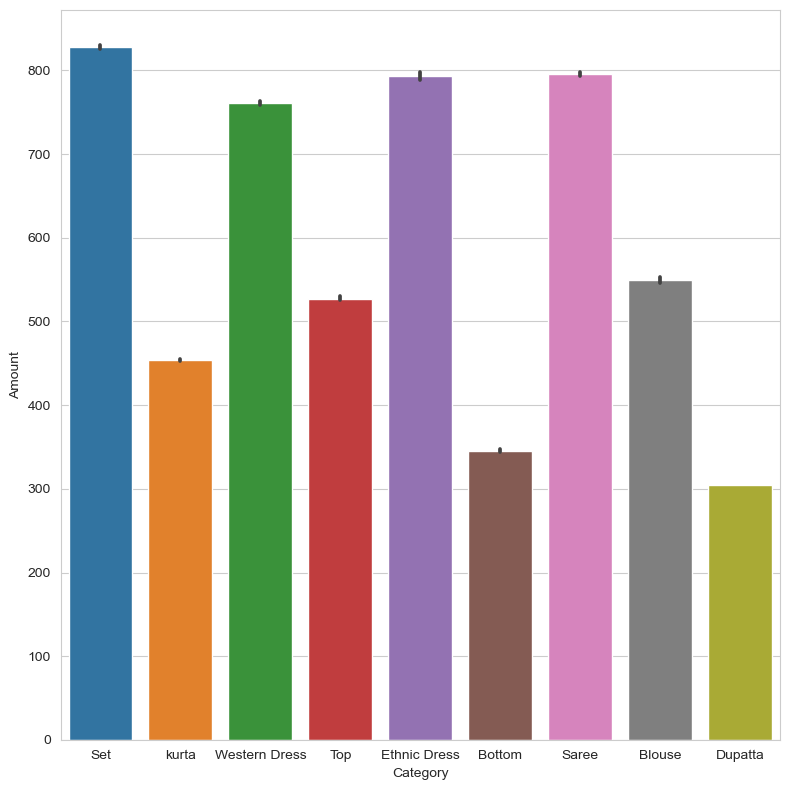

In [80]:
plt.figure(figsize=(8,8))
sns.barplot(data=d1,x='Category',y='Amount')
plt.tight_layout()  
plt.show()

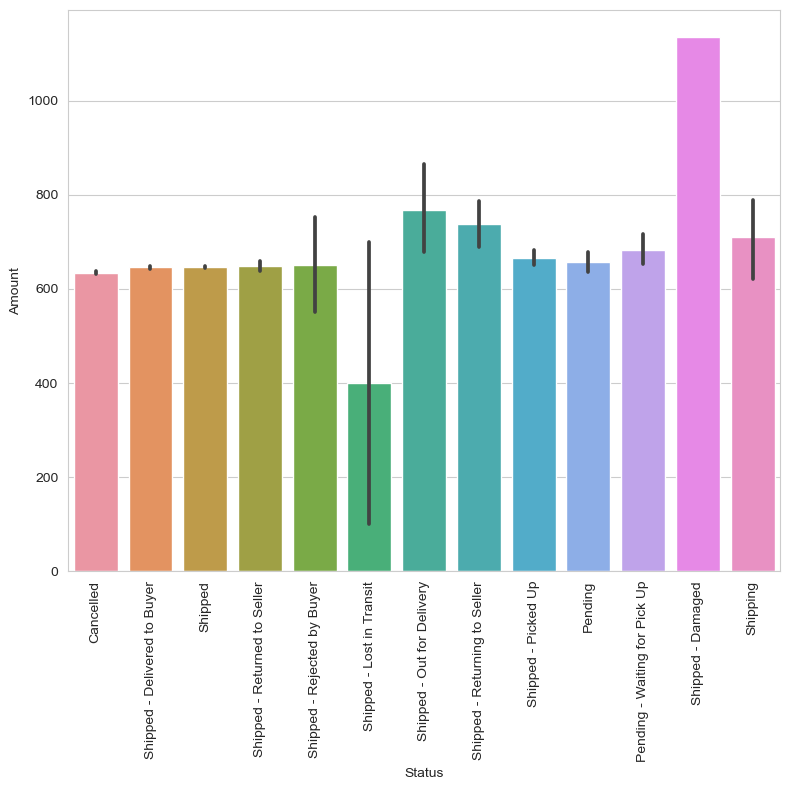

In [81]:
plt.figure(figsize=(8,8))
sns.barplot(data=d1,x='Status',y='Amount')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

In [82]:
d1.columns

Index(['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Category', 'Size', 'Courier Status', 'Qty', 'Amount', 'ship-state',
       'B2B', 'Influence_Score', 'Influence_Category'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

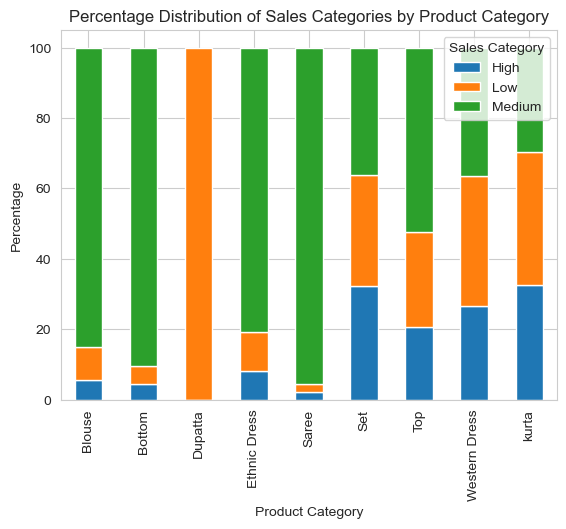

In [83]:
# Calculate the distribution of sales categories within each product category
category_sales_distribution = d1.groupby(['Category', 'Influence_Category']).size().unstack(fill_value=0)

# Calculate the percentage distribution
category_sales_distribution_percentage = category_sales_distribution.div(category_sales_distribution.sum(axis=1), axis=0) * 100

# Plot the distribution
plt.figure(figsize=(12, 8))
category_sales_distribution_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage Distribution of Sales Categories by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.legend(title='Sales Category')
plt.show()

<Figure size 1200x800 with 0 Axes>

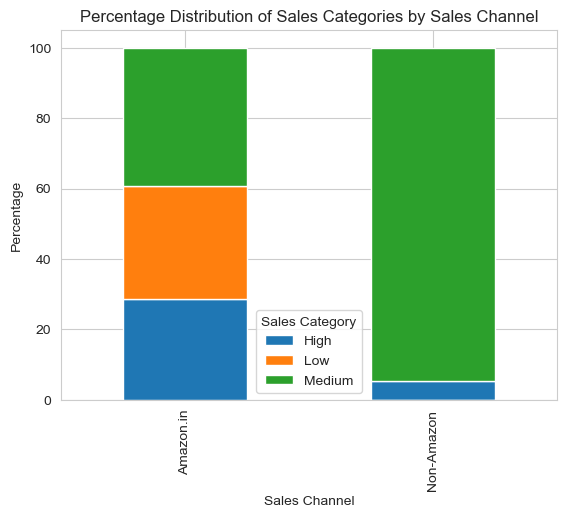

In [84]:
# Group the data by 'Sales Channel' and 'Sales_Category' and count the occurrences
distribution_by_channel = d1.groupby(['Sales Channel ', 'Influence_Category']).size().unstack(fill_value=0)

# Calculate the percentage distribution for better comparison
distribution_by_channel_percentage = distribution_by_channel.div(distribution_by_channel.sum(axis=1), axis=0) * 100

# Plot the distribution
plt.figure(figsize=(12, 8))
distribution_by_channel_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage Distribution of Sales Categories by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Percentage')
plt.legend(title='Sales Category')
plt.show()

<Figure size 2000x1000 with 0 Axes>

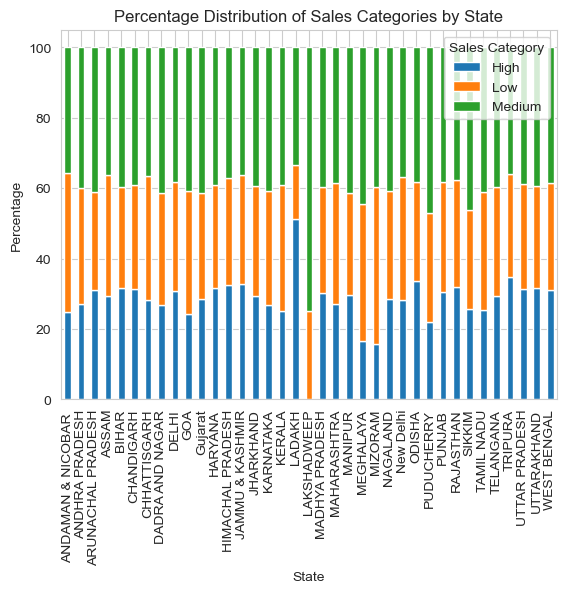

In [85]:
# Group the data by 'ship-state' and 'Sales_Category' and count the occurrences
distribution_by_state = d1.groupby(['ship-state', 'Influence_Category']).size().unstack(fill_value=0)

# Calculate the percentage distribution for better comparison
distribution_by_state_percentage = distribution_by_state.div(distribution_by_state.sum(axis=1), axis=0) * 100

# Plot the distribution
plt.figure(figsize=(20, 10))
distribution_by_state_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage Distribution of Sales Categories by State')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.legend(title='Sales Category')
plt.show()

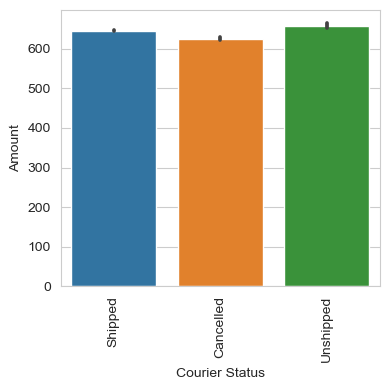

In [86]:
plt.figure(figsize=(4,4))
sns.barplot(data=d1,x='Courier Status',y='Amount')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

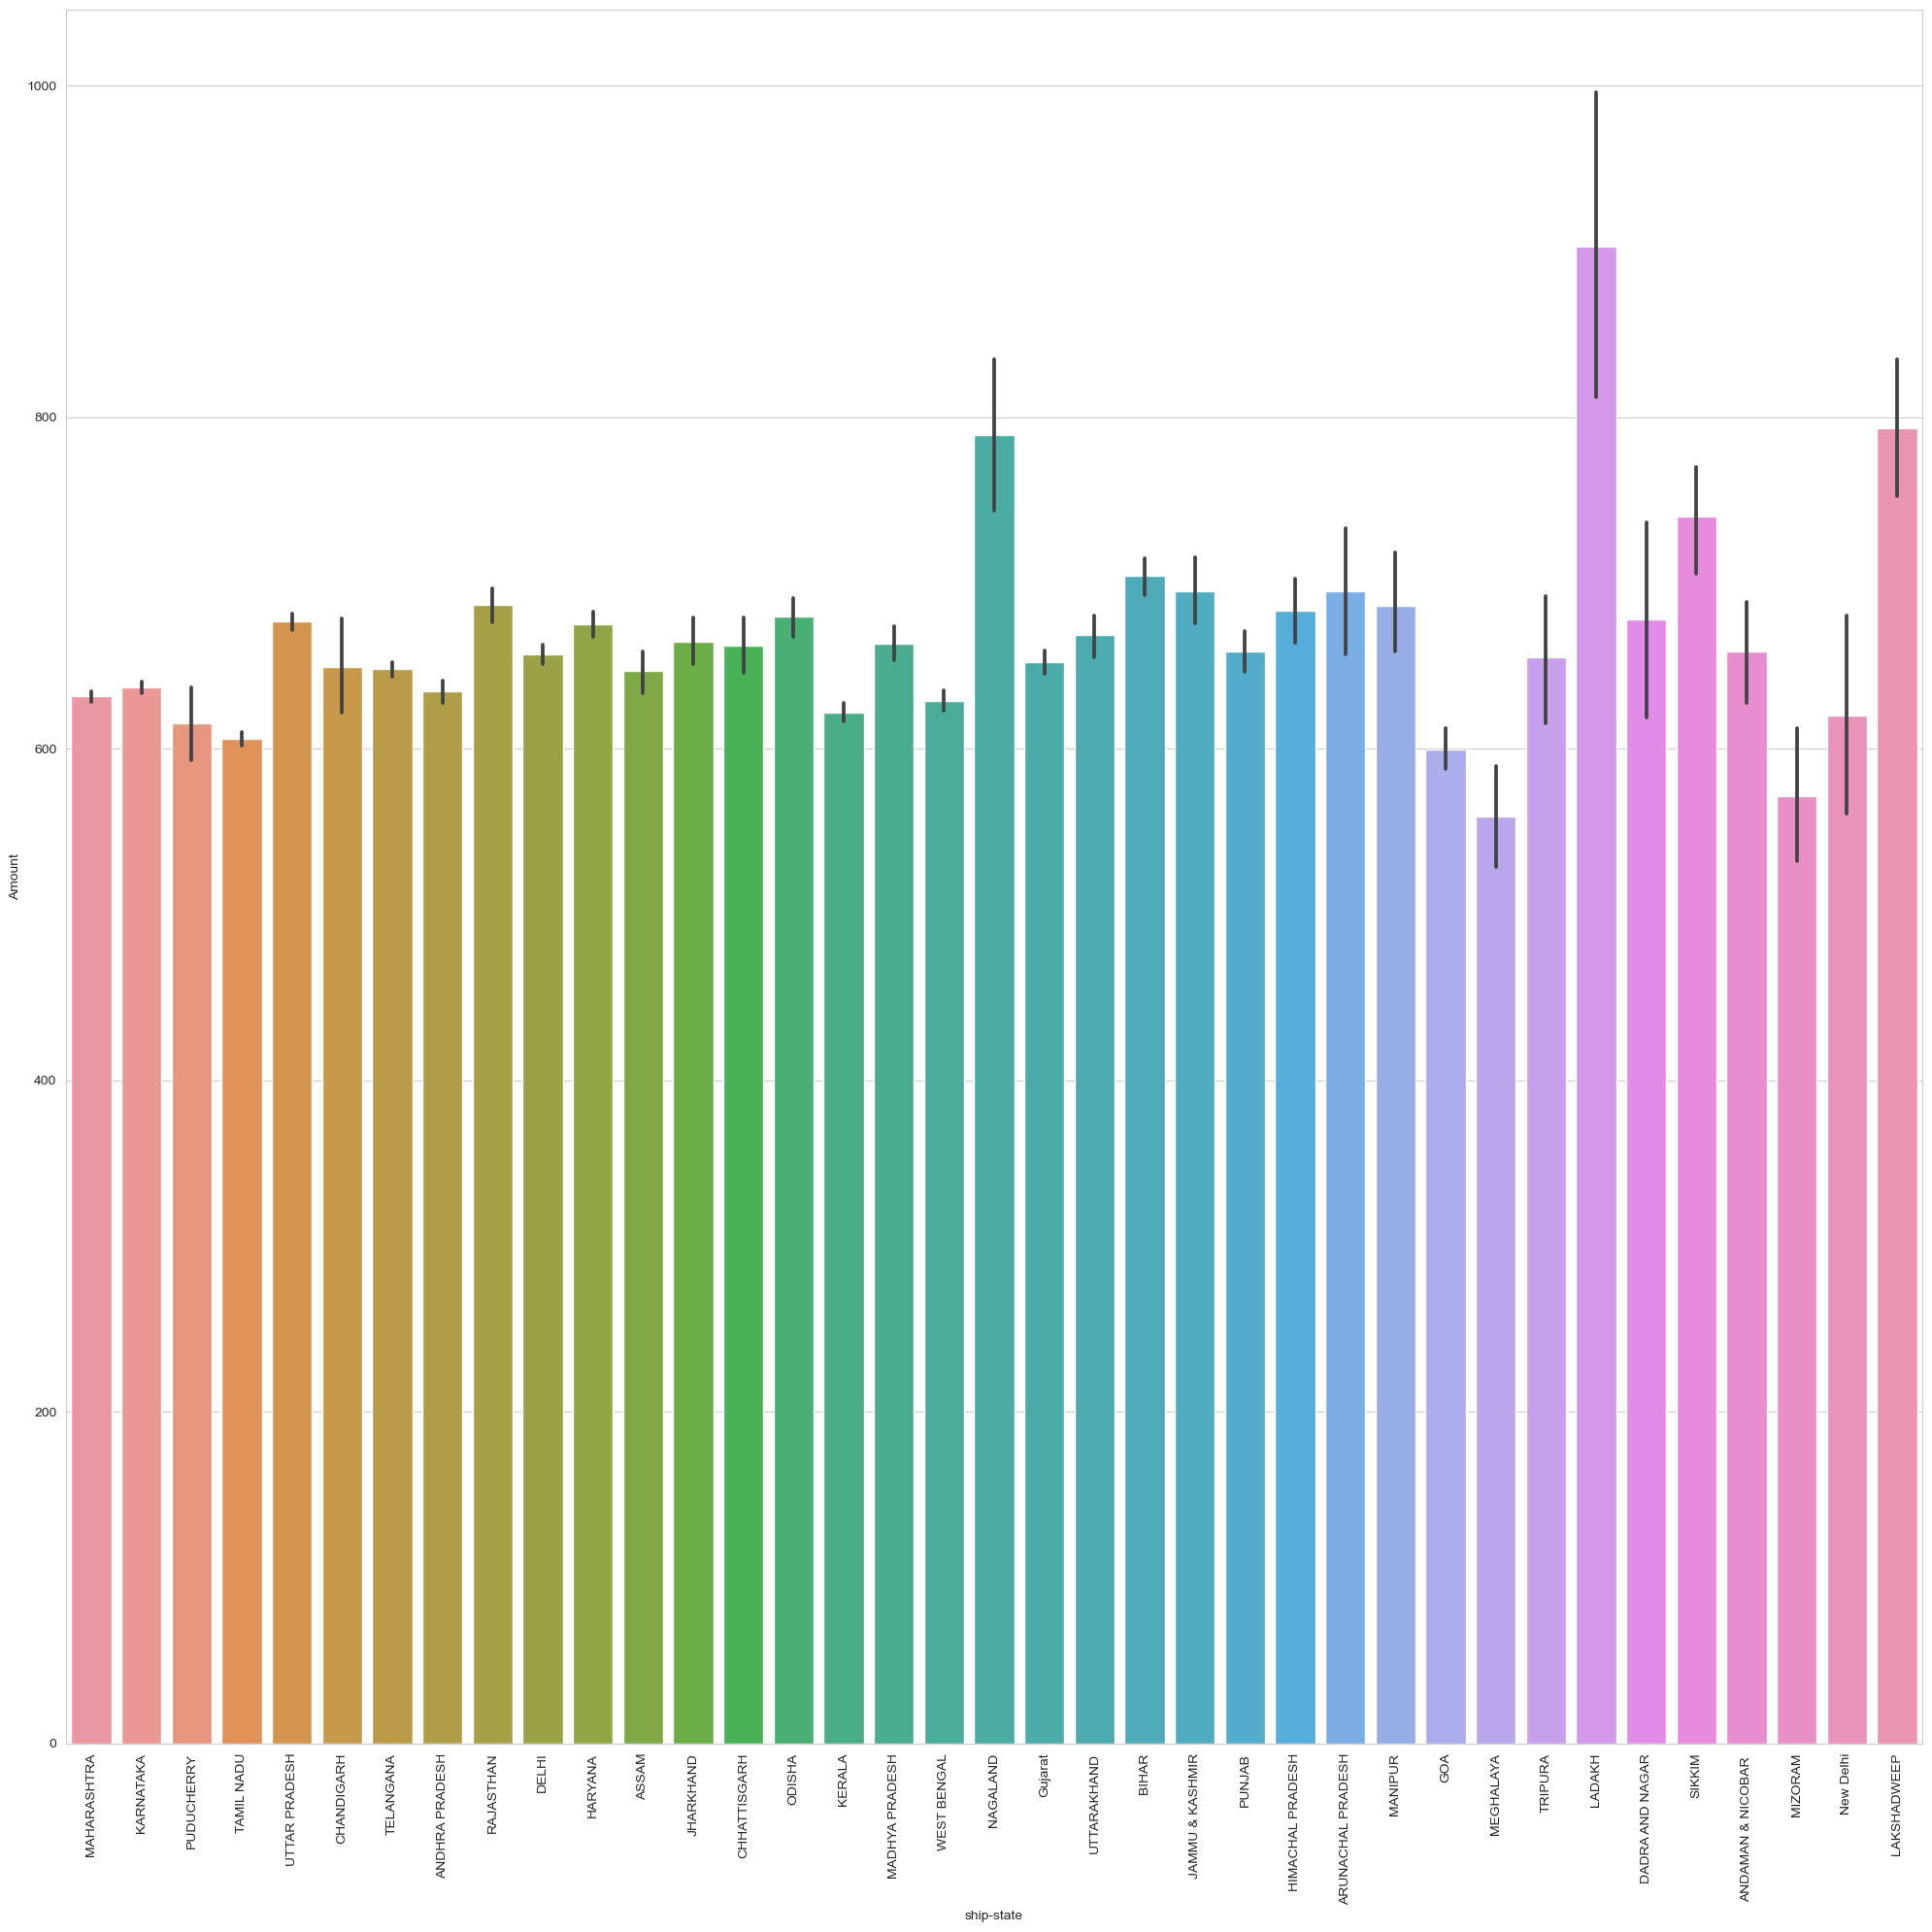

In [87]:
plt.figure(figsize=(20,20))
sns.barplot(data=d1,x='ship-state',y='Amount')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

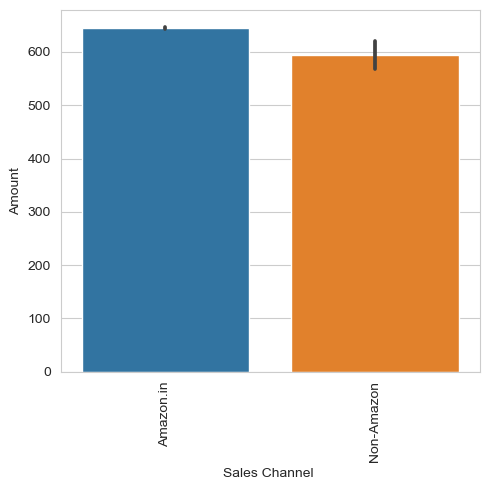

In [88]:
plt.figure(figsize=(5,5))
sns.barplot(data=d1,x='Sales Channel ',y='Amount')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

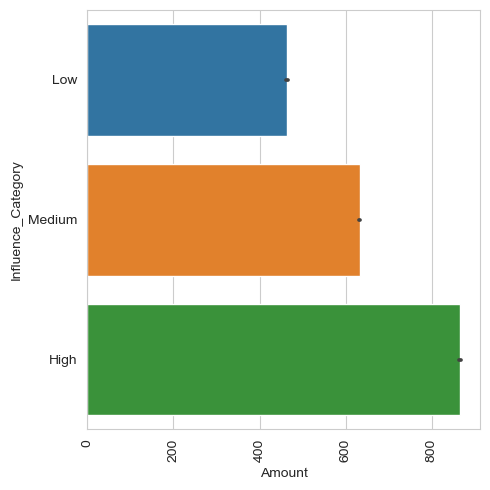

In [89]:
plt.figure(figsize=(5,5))
sns.barplot(data=d1,x='Amount',y='Influence_Category')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

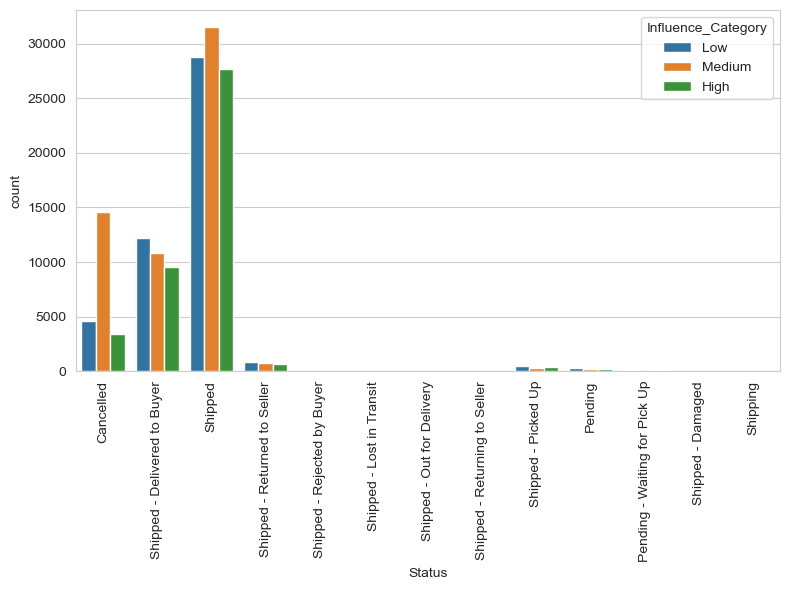

In [90]:
plt.figure(figsize=(8, 6))
sns.countplot(data=d1, x='Status', hue='Influence_Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


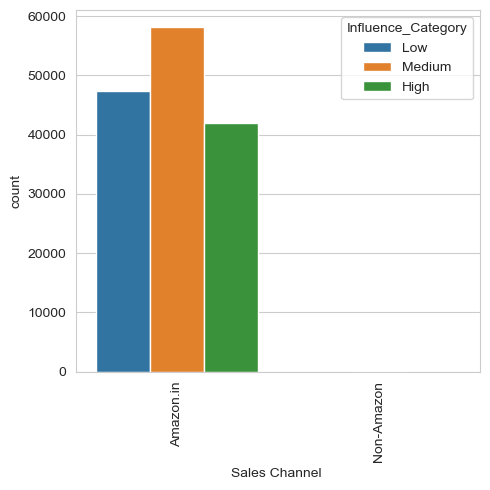

In [91]:
plt.figure(figsize=(5,5))
sns.countplot(data=d1, x='Sales Channel ', hue='Influence_Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

from the above plot we can infer that amazon recieves more no of orders which are giving medium influence to the sale of amazon

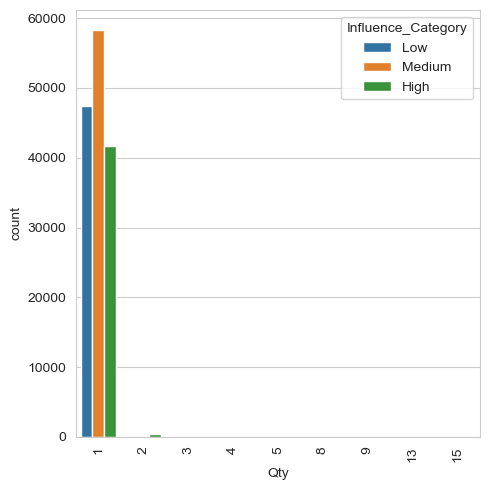

In [92]:
plt.figure(figsize=(5,5))
sns.countplot(data=d1, x='Qty', hue='Influence_Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

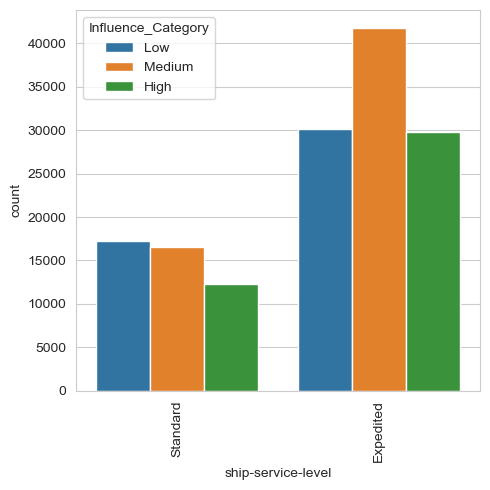

In [93]:
plt.figure(figsize=(5,5))
sns.countplot(data=d1, x='ship-service-level', hue='Influence_Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

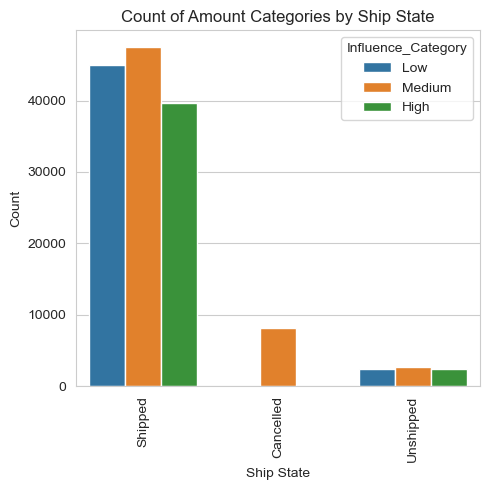

In [94]:
plt.figure(figsize=(5,5))
sns.countplot(data=d1, x='Courier Status', hue='Influence_Category')
plt.xlabel('Ship State')
plt.ylabel('Count')
plt.title('Count of Amount Categories by Ship State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# MULTIVARIATE

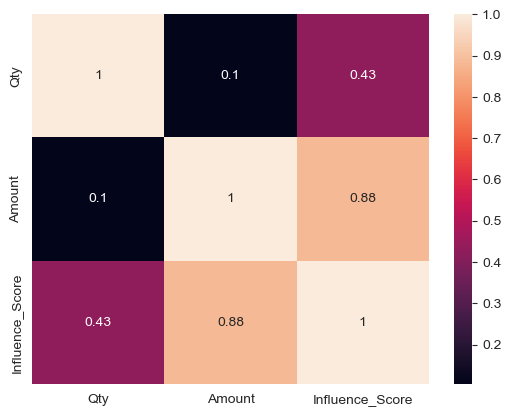

In [95]:
# Assuming 'Cancelled' is a categorical column, and other non-numeric columns exist
# Drop non-numeric columns or exclude them explicitly
numeric_d1 = d1.select_dtypes(include=np.number)



# Calculate correlation and create the heatmap
sns.heatmap(numeric_d1.corr(), annot=True)
plt.show()


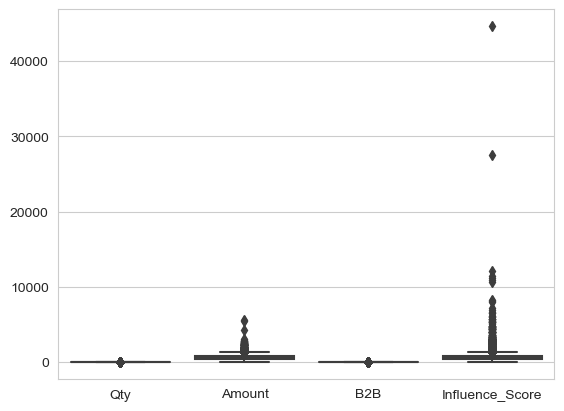

In [96]:
sns.boxplot(d1)
plt.show()

# Outlier Detection

<Figure size 1200x800 with 0 Axes>

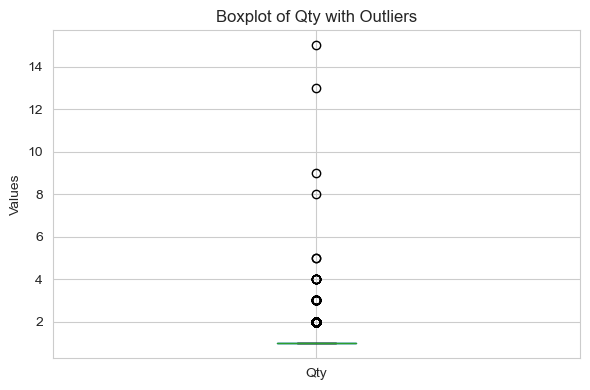

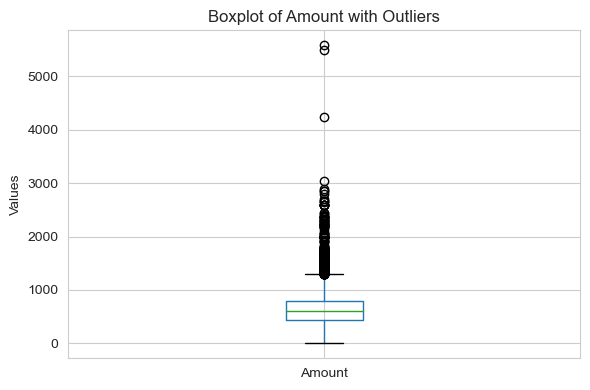

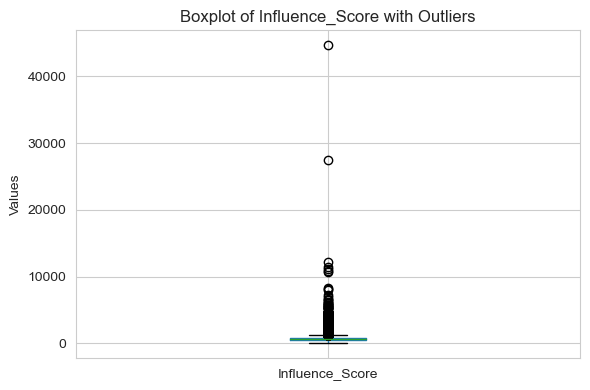

In [97]:
numerical_cols = d1.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(12, 8))

for column in numerical_cols:
    plt.figure(figsize=(6, 4))
    d1[[column]].boxplot()
    plt.title(f'Boxplot of {column} with Outliers')
    plt.ylabel('Values')
    plt.tight_layout()
    
plt.show()


# ENCODING

In [98]:
d1.columns

Index(['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Category', 'Size', 'Courier Status', 'Qty', 'Amount', 'ship-state',
       'B2B', 'Influence_Score', 'Influence_Category'],
      dtype='object')

In [99]:
d1['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [100]:
frequency_encoding = d1['Category'].value_counts(normalize=True).to_dict()
d1['Category'] = d1['Category'].map(frequency_encoding)

In [101]:
d1['Fulfilment']=d1["Fulfilment"].map({'Merchant':1,'Amazon':2})

In [102]:
d1['Sales Channel ']=d1['Sales Channel '].map({'Amazon.in':1,'Non-Amazon':2})

In [103]:
d1['ship-service-level']=d1['ship-service-level'].map({'Standard':1,'Expedited':2})

In [104]:
from sklearn.preprocessing import OrdinalEncoder
Oe = OrdinalEncoder()
d1['Size']=Oe.fit_transform(d1[['Size']])

In [105]:
d1

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-state,B2B,Influence_Score,Influence_Category
0,Cancelled,1,1,1,0.356339,7.0,Shipped,1,647.62,MAHARASHTRA,False,647.62,Low
1,Shipped - Delivered to Buyer,1,1,1,0.353583,0.0,Shipped,1,406.00,KARNATAKA,False,406.00,Medium
2,Shipped,2,1,2,0.353583,8.0,Shipped,1,329.00,MAHARASHTRA,True,329.00,Low
3,Cancelled,1,1,1,0.120789,5.0,Shipped,1,753.33,PUDUCHERRY,False,753.33,Medium
4,Shipped,2,1,2,0.087756,0.0,Shipped,1,574.00,TAMIL NADU,False,574.00,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147666,Shipped,2,1,2,0.353583,0.0,Shipped,1,406.00,KARNATAKA,False,406.00,Medium
147667,Shipped,2,1,2,0.353583,7.0,Shipped,1,406.00,KARNATAKA,False,406.00,Medium
147668,Cancelled,2,1,2,0.353583,10.0,Unshipped,1,471.00,TAMIL NADU,False,471.00,Medium
147669,Cancelled,2,1,2,0.353583,10.0,Cancelled,1,435.00,WEST BENGAL,False,435.00,Medium


In [106]:
d1['Courier Status'].unique()

array(['Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [107]:
d1['Courier Status']=d1['Courier Status'].map({'Shipped':1,'Cancelled':2,'Unshipped':3})

In [108]:
len(d1.columns)

13

In [109]:
d1['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [110]:
frequency_Status = d1['Status'].value_counts(normalize=True).to_dict()
d1['Status'] = d1['Status'].map(frequency_Status)

In [111]:
d1['B2B'].unique()

array([False,  True])

In [112]:
d1['B2B']=d1['B2B'].map({False:0,True:1})

In [113]:
d1['Influence_Category'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [114]:
d1['Influence_Category']=d1['Influence_Category'].map({'Low':0,'Medium':1,'High':2})

In [115]:
len(d1['ship-state'].unique())

37

In [116]:
state_freq = d1['ship-state'].value_counts(normalize=True)
d1['ship-state'] = d1['ship-state'].map(state_freq)

In [117]:
d1

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-state,B2B,Influence_Score,Influence_Category
0,0.153029,1,1,1,0.356339,7.0,1,1,647.62,0.171218,0,647.62,0
1,0.220924,1,1,1,0.353583,0.0,1,1,406.00,0.136635,0,406.00,1
2,0.595547,2,1,2,0.353583,8.0,1,1,329.00,0.171218,1,329.00,0
3,0.153029,1,1,1,0.120789,5.0,1,1,753.33,0.002966,0,753.33,1
4,0.595547,2,1,2,0.087756,0.0,1,1,574.00,0.089875,0,574.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147666,0.595547,2,1,2,0.353583,0.0,1,1,406.00,0.136635,0,406.00,1
147667,0.595547,2,1,2,0.353583,7.0,1,1,406.00,0.136635,0,406.00,1
147668,0.153029,2,1,2,0.353583,10.0,3,1,471.00,0.089875,0,471.00,1
147669,0.153029,2,1,2,0.353583,10.0,2,1,435.00,0.045865,0,435.00,1


In [118]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [119]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

def per_measures(model,test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred,average='macro')
    recall      =recall_score(test,pred,average='macro')
    precision   =precision_score(test,pred,average='macro')
   




    return (accuracy,recall,precision,f1score)

In [120]:
def update_performance (name,model,test,pred):
    # assign 'comp_perf' as global variable
    global perf_score
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]},
                                   ignore_index = True)

# Splitting the data

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x=d1.drop('Influence_Category',axis=1)
y=d1['Influence_Category']

In [123]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [124]:
print("xtrain",xtrain.shape)
print("xtest",xtest.shape)
print("ytrain",ytrain.shape)
print("ytets",ytest.shape)

xtrain (118136, 12)
xtest (29535, 12)
ytrain (118136,)
ytets (29535,)


# Scaling xtrain,xtest

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Logistic Regression model

In [126]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)
print(classification_report(ytest,ypred_lr))


              precision    recall  f1-score   support

           0       0.55      0.62      0.58      9458
           1       0.52      0.50      0.51     11701
           2       0.60      0.54      0.57      8376

    accuracy                           0.55     29535
   macro avg       0.56      0.56      0.55     29535
weighted avg       0.55      0.55      0.55     29535



In [127]:
ypred_lr_train = lr.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_lr_train))
print("Test accuracy",accuracy_score(ytest,ypred_lr))

Train accuracy 0.5488166181350308
Test accuracy 0.5515490096495683


In [128]:
update_performance(name='Logisticreg_base',
                  model=lr,
                  test=ytest,
                  pred=ypred_lr)

In [129]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561


In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10 ], 
               'penalty': ['l1', 'l2']}

In [133]:
grid_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_lr.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [134]:
grid_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [135]:
lr_tuned=LogisticRegression(C=0.001,penalty='l2')
lr_tuned.fit(xtrain,ytrain)
ypred_lrt=lr_tuned.predict(xtest)

In [136]:
ypred_lrt_train = lr_tuned.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_lrt_train))
print("Test accuracy",accuracy_score(ytest,ypred_lrt))

Train accuracy 0.5540648066635064
Test accuracy 0.5571017436939225


In [137]:
update_performance(name='LogisticRegresssion Tuned',
                  model=lr_tuned,
                  test=ytest,
                  pred=ypred_lrt)

In [138]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930


### SVC model

In [139]:
from sklearn.svm import SVC

In [143]:
svc = SVC(kernel='linear', C=1.0)
svc.fit(xtrain, ytrain)
ypred_svc = svc.predict(xtest)


In [144]:
ypred_svc_train = svc.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_svc_train))
print("Test accuracy",accuracy_score(ytest,ypred_svc))

Train accuracy 0.5778086273447552
Test accuracy 0.5784323683765025


In [145]:
update_performance(name='Support Vector Classification',
                  model=svc,
                  test=ytest,
                  pred=ypred_svc)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089


### KNN model

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)

In [147]:
ypred_knn_train = knn.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_knn_train))
print("Test accuracy",accuracy_score(ytest,ypred_knn))

Train accuracy 0.9542222523193608
Test accuracy 0.9303876756390723


In [148]:
update_performance(name='KNN model',
                  model=knn,
                  test=ytest,
                  pred=ypred_knn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749


In [149]:
params={'n_neighbors':[3,4,5,6,7],
       'p':[1,2]}
knn=KNeighborsClassifier()
grid_knn=GridSearchCV(knn,param_grid=params,cv=3,scoring='accuracy')
grid_knn.fit(xtrain,ytrain)
grid_knn.best_params_

{'n_neighbors': 3, 'p': 1}

In [150]:
knn2=KNeighborsClassifier(n_neighbors=3,p=1)
knn2.fit(xtrain,ytrain)
ypred_knn2=knn2.predict(xtest)

In [151]:
ypred_knn2_train = knn2.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_knn2_train))
print("Test accuracy",accuracy_score(ytest,ypred_knn2))

Train accuracy 0.9751049637705695
Test accuracy 0.9485356356864737


In [152]:
update_performance(name='KNN model Tuned',
                  model=knn2,
                  test=ytest,
                  pred=ypred_knn2)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616


### Naive base models

In [153]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [154]:
gb=GaussianNB()
gb.fit(xtrain,ytrain)
ypred_gb=gb.predict(xtest)
ypred_gb_train = gb.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_gb_train))
print("Test accuracy",accuracy_score(ytest,ypred_gb))

Train accuracy 0.34620268165504164
Test accuracy 0.345522261723379


In [156]:
update_performance(name='Gaussian Naivebase model',
                  model=gb,
                  test=ytest,
                  pred=ypred_gb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820


In [157]:
br=BernoulliNB()
br.fit(xtrain,ytrain)
ypred_br=br.predict(xtest)
ypred_br_train = br.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_br_train))
print("Test accuracy",accuracy_score(ytest,ypred_br))

Train accuracy 0.5335376176610008
Test accuracy 0.5360758422210936


In [158]:
update_performance(name='Bernoulli Naivebase model',
                  model=br,
                  test=ytest,
                  pred=ypred_br)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972


### Decision Tree model

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
dc=DecisionTreeClassifier()
dc.fit(xtrain,ytrain)
ypred_dc=dc.predict(xtest)

In [161]:
confusion_matrix(ytest,ypred_dc)

array([[ 9458,     0,     0],
       [    0, 11701,     0],
       [    0,     0,  8376]], dtype=int64)

In [164]:
print('Training Accuracy',dc.score(xtrain,ytrain))
print('Testing Accuracy',dc.score(xtest,ytest))

Training Accuracy 1.0
Testing Accuracy 1.0


In [162]:
update_performance(name='Decision Tree model',
                  model=dc,
                  test=ytest,
                  pred=ypred_dc)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000


In [165]:
params={'criterion':['gini','entropy'],
       'max_depth':[3,4,5,6,7],
       'min_samples_split':[10,15,20],
       'min_samples_leaf':[10,15,20]}
dt1=DecisionTreeClassifier(random_state=42)
grid_dt1=GridSearchCV(dt1,param_grid=params,cv=5,scoring='accuracy')
grid_dt1.fit(xtrain,ytrain)
grid_dt1.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [166]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=10,min_samples_split=10,random_state=42)
dt.fit(xtrain,ytrain)
ypred_dt=dt.predict(xtest )

In [167]:
ypred_dt_train = dt.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_dt_train))
print("Test accuracy",accuracy_score(ytest,ypred_dt))

Train accuracy 0.9767048147897338
Test accuracy 0.9791433891992551


In [168]:
update_performance(name='Decision Tree model Tuned',
                  model=dt,
                  test=ytest,
                  pred=ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226


### Random Forest Model

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rf=RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=10)

In [171]:
ypred_rf_test=rf.predict(xtest)
ypred_rf_train=rf.predict(xtrain)
print("Training accuracy",accuracy_score(ytrain,ypred_rf_train))
print("Test accuracy",accuracy_score(ytest,ypred_rf_test))
print(confusion_matrix(ytrain,ypred_rf_train))
print(classification_report(ytrain,ypred_rf_train))

Training accuracy 1.0
Test accuracy 0.9997629930590824
[[37902     0     0]
 [    0 46566     0]
 [    0     0 33668]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37902
           1       1.00      1.00      1.00     46566
           2       1.00      1.00      1.00     33668

    accuracy                           1.00    118136
   macro avg       1.00      1.00      1.00    118136
weighted avg       1.00      1.00      1.00    118136



In [172]:
update_performance(name='Random Forest Model',model=rf,test=ytest,pred=ypred_rf_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


### oob sample performance

In [173]:
rf=RandomForestClassifier(oob_score=True,random_state=10)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(accuracy_score(ytest,ypred_rf))

print(rf.oob_score_)

0.9997629930590824
0.99984763323627


In [174]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100,200],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

In [175]:
rf=RandomForestClassifier(random_state=10)
rf_cv=GridSearchCV(estimator=rf,param_grid=params,cv=5,scoring='accuracy') 
rf_cv.fit(xtrain,ytrain)
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'n_estimators': 200}

In [176]:
rf_model=RandomForestClassifier(criterion='entropy',
                               n_estimators=200,
                               max_depth=10,
                               max_features='sqrt',
                               max_leaf_nodes=11,
                               min_samples_leaf=9,
                               min_samples_split=2,
                               random_state=10)

In [177]:
rf_model.fit(xtrain,ytrain)
ypred_rf_cv=rf_model.predict(xtest)
ypred_rfcv_train = rf_model.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_rfcv_train))
print("Test accuracy",accuracy_score(ytest,ypred_rf_cv))

Train accuracy 0.9153433331076047
Test accuracy 0.9179955984425258


In [178]:
update_performance(name='Random Forest-Tunned',model=rf_model,test=ytest,pred=ypred_rf_cv)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


### Bagging

In [179]:
from sklearn.ensemble import BaggingClassifier 

In [180]:
dt=DecisionTreeClassifier(random_state=10)
bc=BaggingClassifier(estimator=dt,random_state=10)
bc.fit(xtrain,ytrain)

ypred_bc=bc.predict(xtest)
ypred_bc_train = bc.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_bc_train))
print("Test accuracy",accuracy_score(ytest,ypred_bc))

Train accuracy 0.9999915351797928
Test accuracy 1.0


In [181]:
update_performance(name='Bagging Decision Tree',model=bc,test=ytest,pred=ypred_bc)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


In [182]:
param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_samples': [0.5, 0.7, 1.0],  
    
}
grid_search = GridSearchCV(bc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

grid_search.best_params_

{'max_samples': 0.5, 'n_estimators': 10}

In [183]:
dt=DecisionTreeClassifier(random_state=10)
bc_tuned=BaggingClassifier(estimator=dt,
                     n_estimators=10,
                     max_samples=0.5,
                     warm_start=True,
                     oob_score=False,
                     n_jobs=-1,
                     random_state=10)
bc_tuned.fit(xtrain,ytrain)

ypred_bc_tuned=bc_tuned.predict(xtest)
ypred_bct_train = bc_tuned.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_bct_train))
print("Test accuracy",accuracy_score(ytest,ypred_bc_tuned))

Train accuracy 0.9999407462585495
Test accuracy 0.9998307093279161


In [184]:
update_performance(name='Bagging Decision Tree Tuned',model=bc_tuned,test=ytest,pred=ypred_bc_tuned)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


### Boosting

### Ada Boost Model

In [186]:
from sklearn.ensemble import AdaBoostClassifier

In [187]:
abcl = AdaBoostClassifier(dt,random_state=10)
abcl.fit(xtrain,ytrain)

ypred_abcl = abcl.predict(xtest)
ypred_abcl_train = abcl.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_abcl_train))
print("Test accuracy",accuracy_score(ytest,ypred_abcl))

Train accuracy 1.0
Test accuracy 1.0


In [188]:
update_performance(name='Ada Boost Model',model=abcl,test=ytest,pred=ypred_abcl)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


In [189]:
base_rf_classifier = RandomForestClassifier(n_estimators=50) 

adaboost_rf = AdaBoostClassifier(base_estimator=base_rf_classifier)


param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.5, 1.0], 
    'random_state': [10] 
}
grid_search = GridSearchCV(adaboost_rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
grid_search.best_params_



{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 10}

In [190]:
abcl_tuned=AdaBoostClassifier(random_state=10,learning_rate=0.1,n_estimators=50)
abcl_tuned.fit(xtrain,ytrain)
ypred_abcl_tuned=abcl_tuned.predict(xtest)
ypred_abclt_train =abcl_tuned.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_abclt_train))
print("Test accuracy",accuracy_score(ytest,ypred_abcl_tuned))

Train accuracy 0.8693708945621995
Test accuracy 0.8717453868291857


In [191]:
update_performance(name='Ada Boost Model Tuned',model=abcl_tuned,test=ytest,pred=ypred_abcl_tuned)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


### Gradient Boost Model

In [192]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=10)
gbc.fit(xtrain,ytrain)
ypred_gbc=gbc.predict(xtest)
ypred_gbc_train = gbc.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_gbc_train))
print("Test accuracy",accuracy_score(ytest,ypred_gbc))

Train accuracy 0.9989842215751338
Test accuracy 0.9990519722363298


In [193]:
update_performance(name='Gradient Boost Model',model=gbc,test=ytest,pred=ypred_gbc)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


In [194]:
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],  
  
}
gbc1=GradientBoostingClassifier(random_state=10)
gridsearch=GridSearchCV(estimator=gbc1,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(xtrain, ytrain)
gridsearch.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [195]:
gbct=GradientBoostingClassifier(random_state=10,max_depth=5,min_samples_leaf=1,min_samples_split=2,subsample=1)
gbct.fit(xtrain,ytrain)
ypred_gbct=gbct.predict(xtest)

In [196]:
ypred_gbct_train = gbct.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_gbct_train))
print("Test accuracy",accuracy_score(ytest,ypred_gbct))

Train accuracy 1.0
Test accuracy 1.0


In [197]:
update_performance(name='Gradient Boost Model Tuned',model=gbct,test=ytest,pred=ypred_gbct)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


### xtreme Gradient Boosting

In [198]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)
ypred_xgb=xgb.predict(xtest)

In [199]:
ypred_xgb_train = xgb.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_xgb_train))
print("Test accuracy",accuracy_score(ytest,ypred_xgb))

Train accuracy 0.9969695943658157
Test accuracy 0.9961740308109023


In [200]:
update_performance(name='Xreme Gradient Boost Model',model=xgb,test=ytest,pred=ypred_xgb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg_base,0.551549,0.555248,0.556589,0.554561
1,LogisticRegresssion Tuned,0.557102,0.559192,0.563514,0.559930
2,Support Vector Classification,0.578432,0.574490,0.590176,0.577089
3,KNN model,0.930388,0.925079,0.931543,0.927749
4,KNN model Tuned,0.948536,0.944705,0.949029,0.946616
5,Gaussian Naivebase model,0.345522,0.362022,0.617741,0.221820
6,Bernoulli Naivebase model,0.536076,0.549376,0.541607,0.527972
7,Decision Tree model,1.000000,1.000000,1.000000,1.000000
8,Decision Tree model Tuned,0.979143,0.976150,0.983306,0.979226
9,Random Forest Model,0.999763,0.999744,0.999789,0.999767


In [201]:
train_accuracy=accuracy_score(ytrain,ypred_dt_train)
val_accuracy=accuracy_score(ytest,ypred_dt)

# Calculate bias, variance, and noise
bias = 1 - train_accuracy  # Bias is the training error
variance = val_accuracy - train_accuracy  # Variance is the difference between validation and training accuracy
noise = 1 - val_accuracy  # Noise is the validation error

# Calculate percentages
total_error = bias + variance + noise
bias_percentage = (bias / total_error) * 100
variance_percentage = (variance / total_error) * 100
noise_percentage = (noise / total_error) * 100

# Display the percentages
print(f'Bias Percentage: {bias_percentage:.2f}%')
print(f'Variance Percentage: {variance_percentage:.2f}%')
print(f'Noise Percentage: {noise_percentage:.2f}%')


Bias Percentage: 50.00%
Variance Percentage: 5.23%
Noise Percentage: 44.77%
